## Project

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

## Read the Train Dataset

In [2]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
s=df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Create X and Y (Seperate dependent and Independent features)

In [5]:
X = df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [6]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Perform cat,con Seperation

In [8]:
cat=list(X.columns[X.dtypes==object])
con=list(X.columns[X.dtypes!=object])

In [9]:
cat

['Type']

In [10]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

## Build Pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipelines
pre = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [13]:
X_pre=pre.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [14]:
cols=pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [17]:
xtrain.shape

(109143, 11)

In [18]:
xtest.shape

(27286, 11)

## Evaluate Algorithms

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [20]:
dct = {'LogisticRegression':LogisticRegression(),
       'DecisionTree':DecisionTreeClassifier(),
       'RandomForest':RandomForestClassifier(),
       'GradientBoosting':GradientBoostingClassifier()}

In [21]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier())])

In [22]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model on training data
    model.fit(xtrain, ytrain)

    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    # Calculate F1 scores Training
    f1_tr = f1_score(ytrain, ypred_tr)

    # Calculate F1 Cross validated results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_tr_cv = scores.mean()

    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)

    # Append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    # Print the results
    print(f'Model Name : {name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training CV : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n===========================================\n')

Model Name : LogisticRegression

F1 Training : 0.8625
F1 Training CV : 0.8622
F1 Testing : 0.8649


Model Name : DecisionTree

F1 Training : 0.9950
F1 Training CV : 0.7476
F1 Testing : 0.7609


Model Name : RandomForest

F1 Training : 0.9950
F1 Training CV : 0.8561
F1 Testing : 0.8626


Model Name : GradientBoosting

F1 Training : 0.8730
F1 Training CV : 0.8588
F1 Testing : 0.8648




### Create a dataframe for model evaluation

In [23]:
dct_eval = {'Name':list(dct.keys()),
            'TrainF1':tr,
            'TrainF1CV':tr_cv,
            'TestF1':ts}

In [24]:
df_eval = pd.DataFrame(dct_eval)
df_eval

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.862525,0.862230,0.864865
1,DecisionTree,0.995007,0.747620,0.760943
2,RandomForest,0.995010,0.856083,0.862644
3,GradientBoosting,0.872954,0.858778,0.864796


In [25]:
df_eval.sort_values(by='TestF1',ascending=False)

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.862525,0.862230,0.864865
3,GradientBoosting,0.872954,0.858778,0.864796
2,RandomForest,0.995010,0.856083,0.862644
1,DecisionTree,0.995007,0.747620,0.760943


### Select the logistic regression model having higher Testing and Crossvalidation result

In [26]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]}

In [27]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1', random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,
                                              1000]},
                   random_state=21, scoring='f1')

In [28]:
rscv.best_params_

{'C': 0.1}

In [29]:
rscv.best_score_

0.862513786746223

In [30]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.1)

## Evaluate best Model

In [31]:
best_lr.score(xtrain,ytrain)

0.9961976489559569

In [32]:
best_lr.score(xtest,ytest)

0.9961518727552591

## Predict Train Test Data

In [33]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [34]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [35]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [36]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [37]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


## Create Confusion Matrix

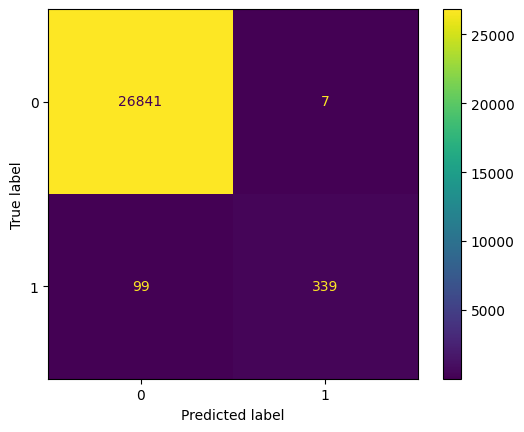

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Print Classification Report on test data

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.98      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Calculate ROC - AUC Score

In [40]:
yprob_tr = best_lr.predict_proba(xtrain)[:,1]
yprob_ts = best_lr.predict_proba(xtest)[:,1]

In [41]:
yprob_tr[0:5]

array([0.00422455, 0.00409079, 0.00555218, 0.00092476, 0.00177181])

In [42]:
yprob_ts[0:5]

array([0.99352317, 0.00220135, 0.00231608, 0.00165675, 0.00404397])

In [43]:
## Check roc_auc score in training
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain, yprob_tr)

0.9367410903126188

In [44]:
## Check roc auc score in testing
roc_auc_score(ytest, yprob_ts)

0.9373719325028165

## Plot the ROC AUC Score

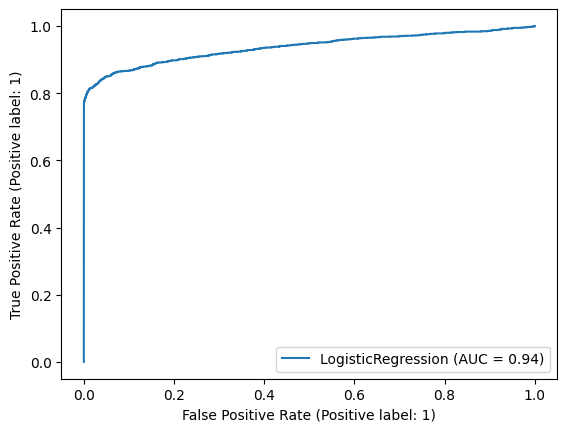

In [45]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain, ytrain)

## Predict The Test Data

In [46]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [47]:
xnew_pre = pre.transform(xnew)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [48]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


In [49]:
# Predict values
preds = best_lr.predict(xnew_pre)
probs = best_lr.predict_proba(xnew_pre)[:,1]

In [50]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [51]:
probs[0:5]

array([0.00213678, 0.00105716, 0.00260437, 0.00330934, 0.00412892])

## Creating Final Result in Dataframe

In [52]:
df_res = xnew[['id']]
df_res

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [53]:
df_res['Machine failure']=preds
df_res['Probability']=probs

In [54]:
df_res

,id,Machine failure,Probability
0,136429,0,0.002137
1,136430,0,0.001057
2,136431,0,0.002604
3,136432,0,0.003309
4,136433,0,0.004129
...,...,...,...
90949,227378,0,0.002243
90950,227379,0,0.000495
90951,227380,0,0.002954
90952,227381,0,0.002318


<Axes: xlabel='Machine failure'>

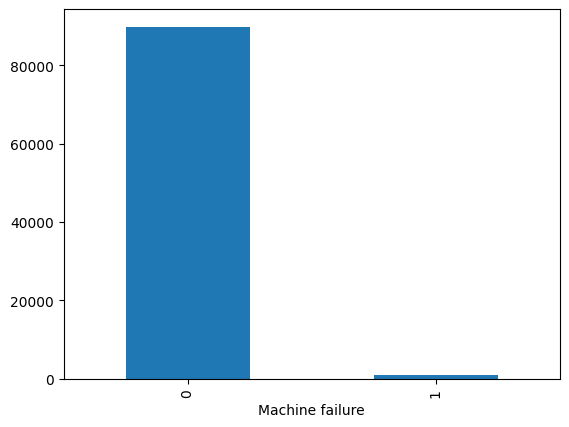

In [55]:
df_res['Machine failure'].value_counts().plot(kind='bar')

In [56]:
df_res.to_csv('Predictions.csv',index=False)